## Linear SVC on the smoky area

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = dd.read_csv('test4_smoke*.csv')
df = df.compute()
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X = X.to_numpy()
y = y.to_numpy().reshape(-1)
print(df.shape)
del df




(63000, 67)


In [2]:
from sklearn.svm import LinearSVC

In [3]:
svc = LinearSVC(max_iter  = 10000, C = 5)
svc.fit(X, y)

/home/lpa263/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=5, max_iter=10000)

In [4]:
quant_names = pd.read_csv('smoke_polyname.csv')

In [5]:
colors = ['blue' if abs(x) < 1 else 'red' for x in svc.coef_.reshape(-1)]

<ipython-input-6-b556967e569d>:3: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_xticklabels(quant_names.smoke_polynames, {'fontsize' : 13},rotation=90)
<ipython-input-6-b556967e569d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(quant_names.smoke_polynames, {'fontsize' : 13},rotation=90)
<ipython-input-6-b556967e569d>:4: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_yticklabels([-3, -2,-1,0,1,2,3],{'fontsize' : 13},rotation=90)
<ipython-input-6-b556967e569d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([-3, -2,-1,0,1,2,3],{'fontsize' : 13},rotation=90)


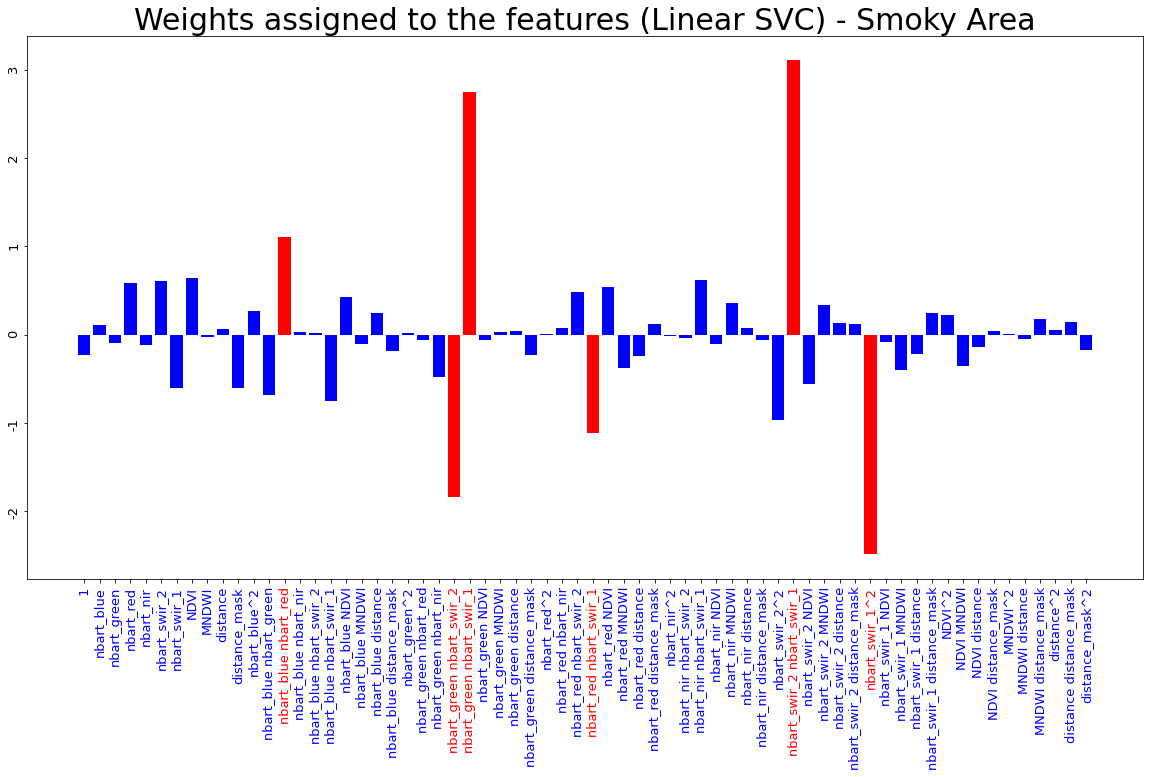

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(x = quant_names.smoke_polynames,height = svc.coef_.reshape(-1), color = colors)
ax.set_xticklabels(quant_names.smoke_polynames, {'fontsize' : 13},rotation=90)
ax.set_yticklabels([-3, -2,-1,0,1,2,3],{'fontsize' : 13},rotation=90)
[t.set_color(i) for (i,t) in
 zip(colors,ax.xaxis.get_ticklabels())]
ax.set_title('Weights assigned to the features (Linear SVC) - Smoky Area', {'fontsize': 30})
plt.savefig('SVC_weights.png')
plt.show()